In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels as sm
import matplotlib.pyplot as plt

In [3]:
movies_df=pd.read_csv("tmdb_5000_movies.csv")
credits_df=pd.read_csv("tmdb_5000_credits.csv")

movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies_df['vote_average'].value_counts()

vote_average
6.5    216
6.0    216
6.7    213
6.3    207
6.1    201
      ... 
2.7      1
0.5      1
2.2      1
1.9      1
2.4      1
Name: count, Length: 71, dtype: int64

In [8]:
movies_df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [9]:
movies_df.duplicated().sum()

0

In [10]:
import ast
movies_df2 = movies_df
movies_df2['genre_list'] = movies_df['genres'].map(ast.literal_eval)
movies_df2['company_list'] = movies_df['production_companies'].map(ast.literal_eval)
movies_df2['countries_list'] = movies_df['production_countries'].map(ast.literal_eval)
movies_df2['keyword_list'] = movies_df['keywords'].map(ast.literal_eval)
movies_df2['release_date'] = pd.to_datetime(movies_df2['release_date'])

movies_df2 = movies_df2.drop(columns=['keywords', 'genres','homepage','original_language', 'original_title', 'overview', 'spoken_languages', 'status', 'tagline', 'production_countries', 'production_companies'])
movies_df2.head()


,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':..."
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na..."
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name..."
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,..."
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':..."


In [11]:
movies_df2['Year_of_Release'] = movies_df2['release_date'].dt.year
movies_df2['Month_of_Release'] = movies_df2['release_date'].dt.month
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0


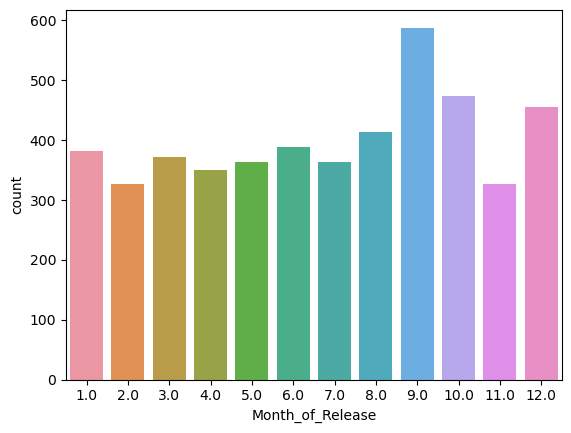

In [12]:
month_stats = pd.DataFrame(movies_df2['Month_of_Release'].value_counts()).sort_index().reset_index()
sns.barplot(data = month_stats, x = month_stats['Month_of_Release'], y = month_stats['count'])
plt.show()


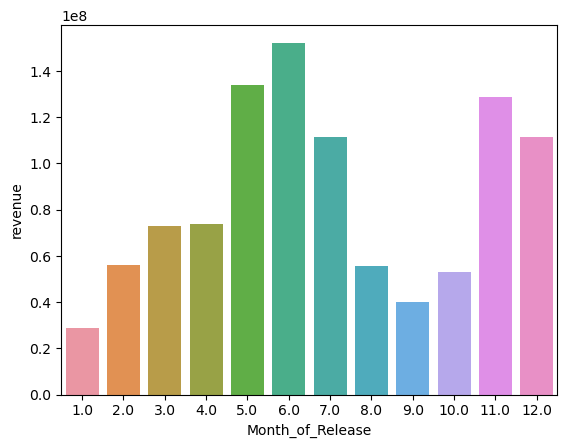

In [13]:
revenue_by_month = pd.DataFrame(movies_df2['revenue'].groupby(movies_df2['Month_of_Release']).mean()).sort_index().reset_index()
revenue_by_month.head()
sns.barplot(data = month_stats, x = revenue_by_month['Month_of_Release'], y = revenue_by_month['revenue'])
plt.show()

In [14]:
year_stats = pd.DataFrame(movies_df2['Year_of_Release'].value_counts()).sort_index().reset_index()
print("Last Year: " + str(year_stats['Year_of_Release'].max()))
print("First Year: " + str(year_stats['Year_of_Release'].min()))

Last Year: 2017.0
First Year: 1916.0


In [15]:
# Classify year of release as Before 2000 or as the year 2000 and after
century = []
for i in range(len(movies_df2)):
    if (movies_df2['Year_of_Release'][i] >= 2000.0):
        century.append('Post-2000')
    else:
        century.append('Pre-2000')
        
movies_df2['Century_of_Release'] = pd.DataFrame(century)
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0,Post-2000
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0,Post-2000
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0,Post-2000
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0,Post-2000
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0,Post-2000


  Century_of_Release       revenue
0          Post-2000  8.768677e+07
1           Pre-2000  6.777715e+07


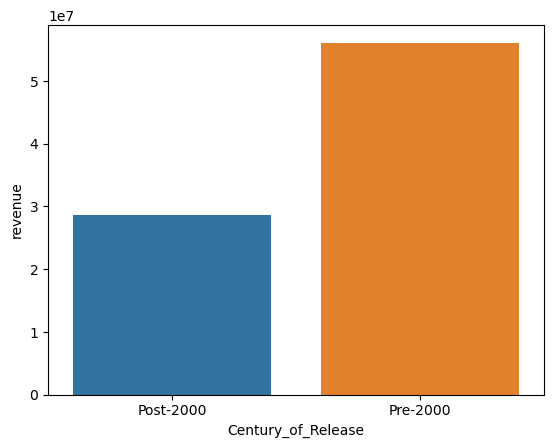

In [16]:
revenue_by_century = pd.DataFrame(movies_df2['revenue'].groupby(movies_df2['Century_of_Release']).mean()).sort_index().reset_index()
print(revenue_by_century.head())
sns.barplot(data = month_stats, x = revenue_by_century['Century_of_Release'], y = revenue_by_month['revenue'])
plt.show()

  Century_of_Release  count
0          Post-2000   3494
1           Pre-2000   1309


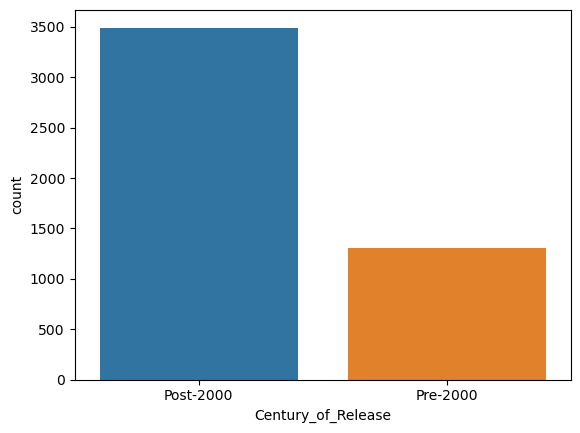

In [17]:
release_century = pd.DataFrame(movies_df2['Century_of_Release'].value_counts()).sort_index().reset_index()
print(release_century.head())
sns.barplot(data = release_century, x = release_century['Century_of_Release'], y = release_century['count'])
plt.show()

In [18]:
import ast
import random

def get_dict_elem(column):
    test = []
    for i in range(len(movies_df2[column])):
        if(len(movies_df2[column].iloc[i]) > 0):
            inner_dict = {}
            for j in range(len(movies_df2[column].iloc[i])):
                test.append(str(movies_df2[column][i][j]['name']))
        else:
            test.append(str("Null"))
    return test        

result = get_dict_elem('countries_list')
df_test = pd.DataFrame(result)
df_test.head()
df_test.value_counts()

United States of America    3956
United Kingdom               636
Germany                      324
France                       306
Canada                       261
                            ... 
Lebanon                        1
Lithuania                      1
Monaco                         1
Nigeria                        1
Afghanistan                    1
Name: count, Length: 89, dtype: int64

In [19]:
genres = {
    18 : 'Drama', 35 : 'Comedy', 28 : 'Action', 12 : 'Adventure',
    27 : 'Horror', 80 : 'Crime', 53 : 'Thriller', 16 : 'Animation',
    14 : 'Fantasy', 10749 : 'Romance', 878 : 'Science Fiction', 99 : 'Documentary',
    10751 : 'Family', 9648 : 'Mystery', 10402 : 'Music', 37 : 'Western',
    36 : 'History', 10752 : 'War', 10770 : 'TV Movie', 10769 : 'Foreign'
}

genre_ids = list(genres.keys())
genre_names = list(genres.values())

## Get IDs of Movies depending on Genre
def get_genre(name):
    id_test = []
    for i in range(len(movies_df2['genre_list'])):
        for j in range(len(movies_df2['genre_list'].iloc[i])):
            if(movies_df2['genre_list'][i][j]['name'] == name):
                id_test.append(movies_df2['id'][i])
    return id_test

# name = genres[10769]
# movie_ids = get_genre(name)
# print(len(movie_ids))
# print(genre_ids)
# print(genre_names)


In [20]:
genre_totals = {}
for i in range(len(genre_names)):
    name = genre_names[i]
    id_list = get_genre(name)
    count = len(id_list)
    genre_totals[name] = count

In [21]:
genre_counts_df = pd.DataFrame.from_dict(genre_totals, orient='index', columns=['count'])
genre_counts_df = genre_counts_df.sort_values(by='count', ascending=False)
genre_counts_df

,count
Drama,2297
Comedy,1722
Thriller,1274
Action,1154
Romance,894
Adventure,790
Crime,696
Science Fiction,535
Horror,519
Family,513


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Science Fiction'),
  Text(8, 0, 'Horror'),
  Text(9, 0, 'Family'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Mystery'),
  Text(12, 0, 'Animation'),
  Text(13, 0, 'History'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Documentary'),
  Text(17, 0, 'Western'),
  Text(18, 0, 'Foreign'),
  Text(19, 0, 'TV Movie')])

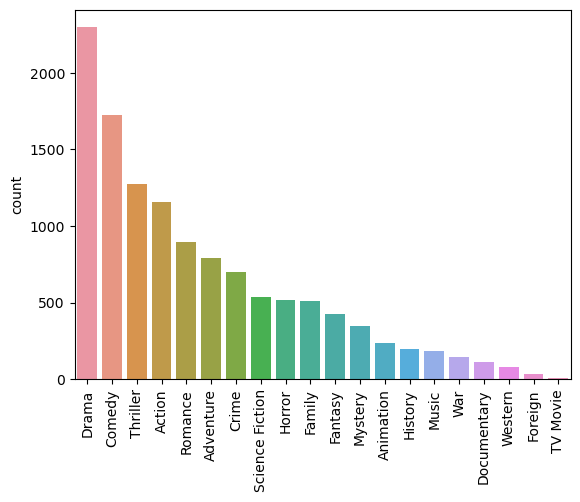

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = genre_counts_df, x = genre_counts_df.index, y = genre_counts_df['count'])
plt.xticks(rotation=90)

In [23]:
## Create a new column in the dataframe that organizes vote averages into vote ranges.
## 0, 0-1, 1-2, 3-4, 4-5, 5-6, 6-7, 7-8, 8-9, 9-10

def sort_ratings(df):
    a = b = c = d = e = f = g = h = m = j = k = l = 0
    rating_list = []

    for i in range(len(df)):
        if(0.0 <= df['vote_average'][i] < 1.0):
            rating_list.append('0-1')
        elif(1.0 <= df['vote_average'][i] < 2.0):
            rating_list.append('1-2')
        elif(2.0 <= df['vote_average'][i] < 3.0):
            rating_list.append('2-3')
        elif(3.0 <= df['vote_average'][i] < 4.0):
            rating_list.append('3-4')
        elif(4.0 <= df['vote_average'][i] < 5.0):
            rating_list.append('4-5')
        elif(5.0 <= df['vote_average'][i] < 6.0):
            rating_list.append('5-6')
        elif(6.0 <= df['vote_average'][i] < 7.0):
            rating_list.append('6-7')
        elif(7.0 <= df['vote_average'][i] < 8.0):
            rating_list.append('7-8')
        elif(8.0 <= df['vote_average'][i] < 9.0):
            rating_list.append('8-9')
        elif(9.0 <= df['vote_average'][i] <= 10.0):
            rating_list.append('9-10')
        else:
            rating_list.append('0-1')
    return rating_list
    
sorted_ratings = sort_ratings(movies_df2)
rating_df = pd.DataFrame(sorted_ratings, columns=['range'])
movies_df2['rating_range'] = rating_df

In [24]:
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release,rating_range
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0,Post-2000,7-8
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0,Post-2000,6-7
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0,Post-2000,6-7
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0,Post-2000,7-8
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0,Post-2000,6-7


Text(0.5, 0, 'range')

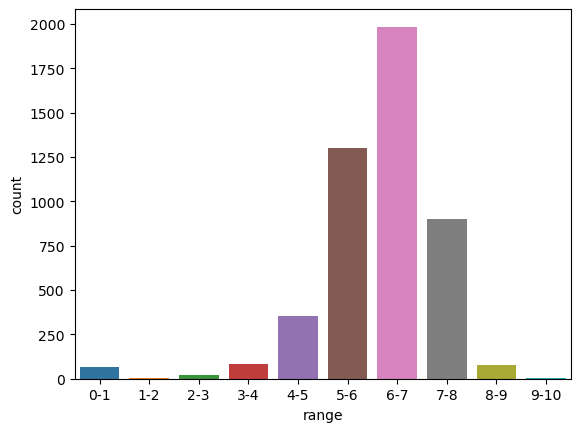

In [25]:
count = rating_df.value_counts()
rating_count = pd.DataFrame(count).sort_index().reset_index()
sns.barplot(data = rating_count, x = rating_count['range'], y = rating_count['count'])
plt.xlabel('range')

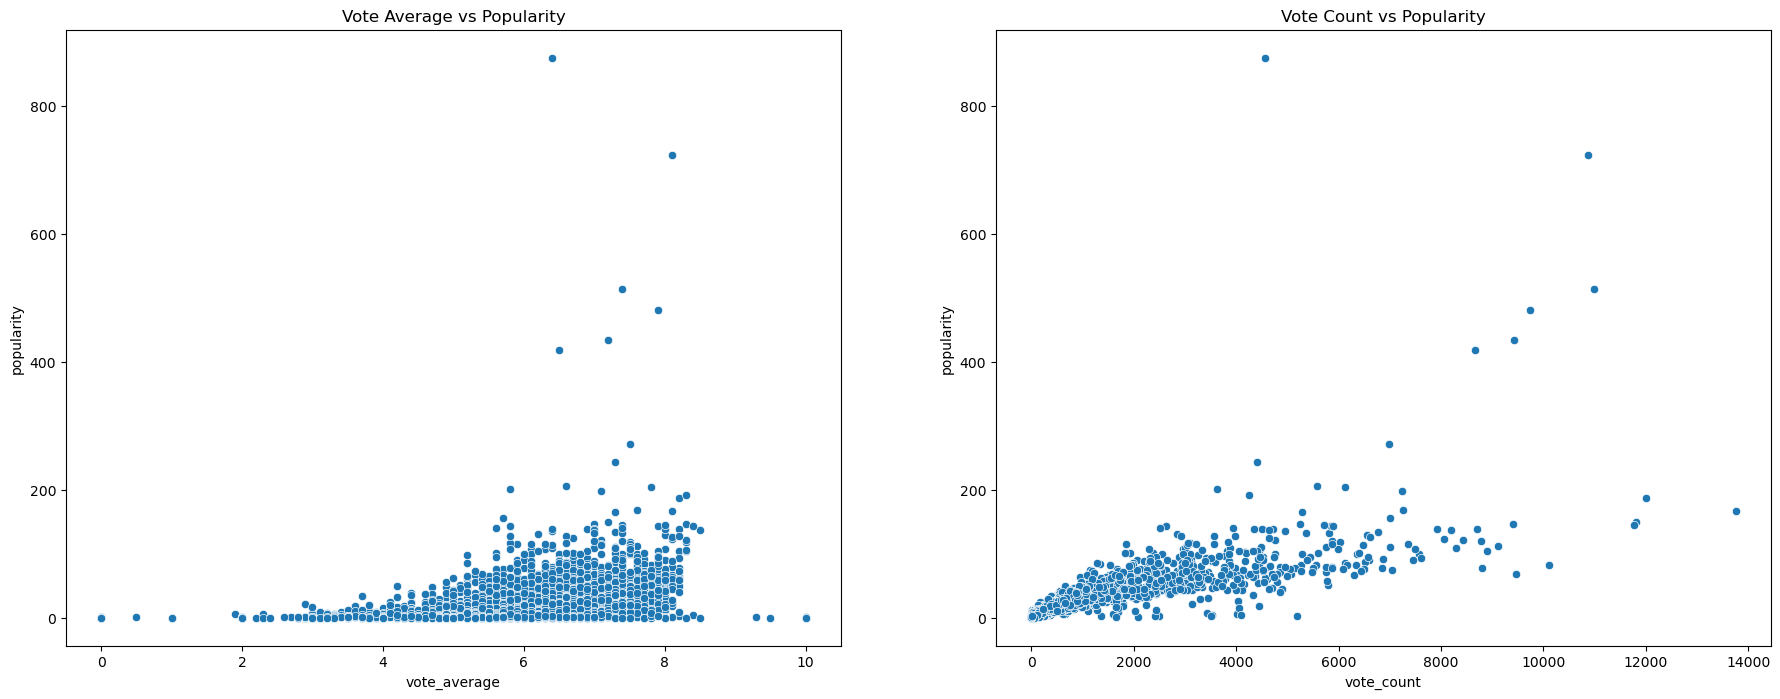

In [26]:
fig, ax = plt.subplots(1,2,figsize=(22,8))
sns.scatterplot(data=movies_df2, x=movies_df2['vote_average'], y=movies_df2['popularity'], ax=ax[0])
sns.scatterplot(data=movies_df2, x=movies_df2['vote_count'], y=movies_df2['popularity'], ax=ax[1])

ax[0].set_title('Vote Average vs Popularity')
ax[1].set_title('Vote Count vs Popularity')

plt.show()

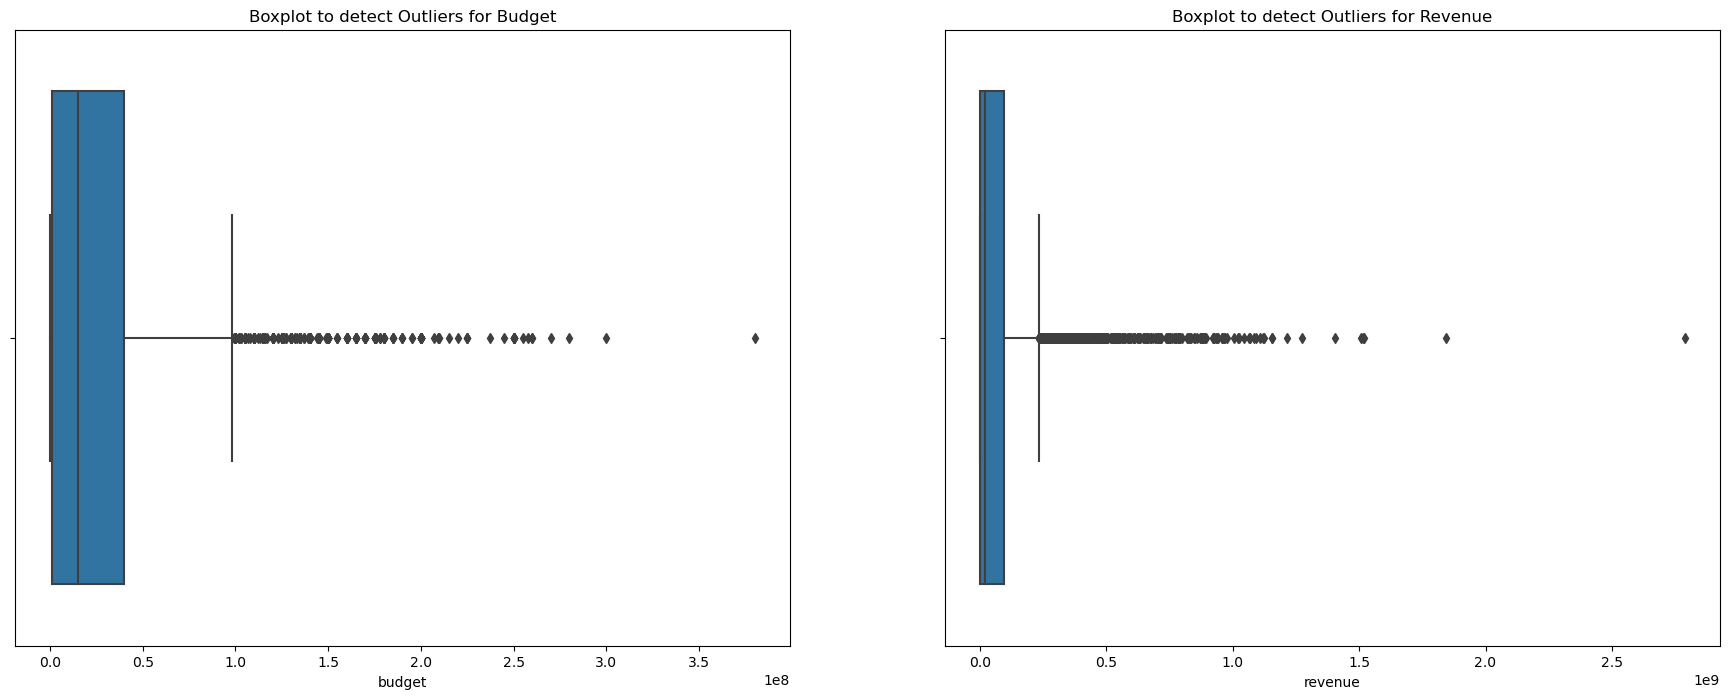

In [27]:
fig, ax = plt.subplots(1,2,figsize=(22,8))

sns.boxplot(x=movies_df2['budget'], ax=ax[0])
sns.boxplot(x=movies_df2['revenue'], ax=ax[1])

ax[0].set_title('Boxplot to detect Outliers for Budget')
ax[1].set_title('Boxplot to detect Outliers for Revenue')

plt.show()

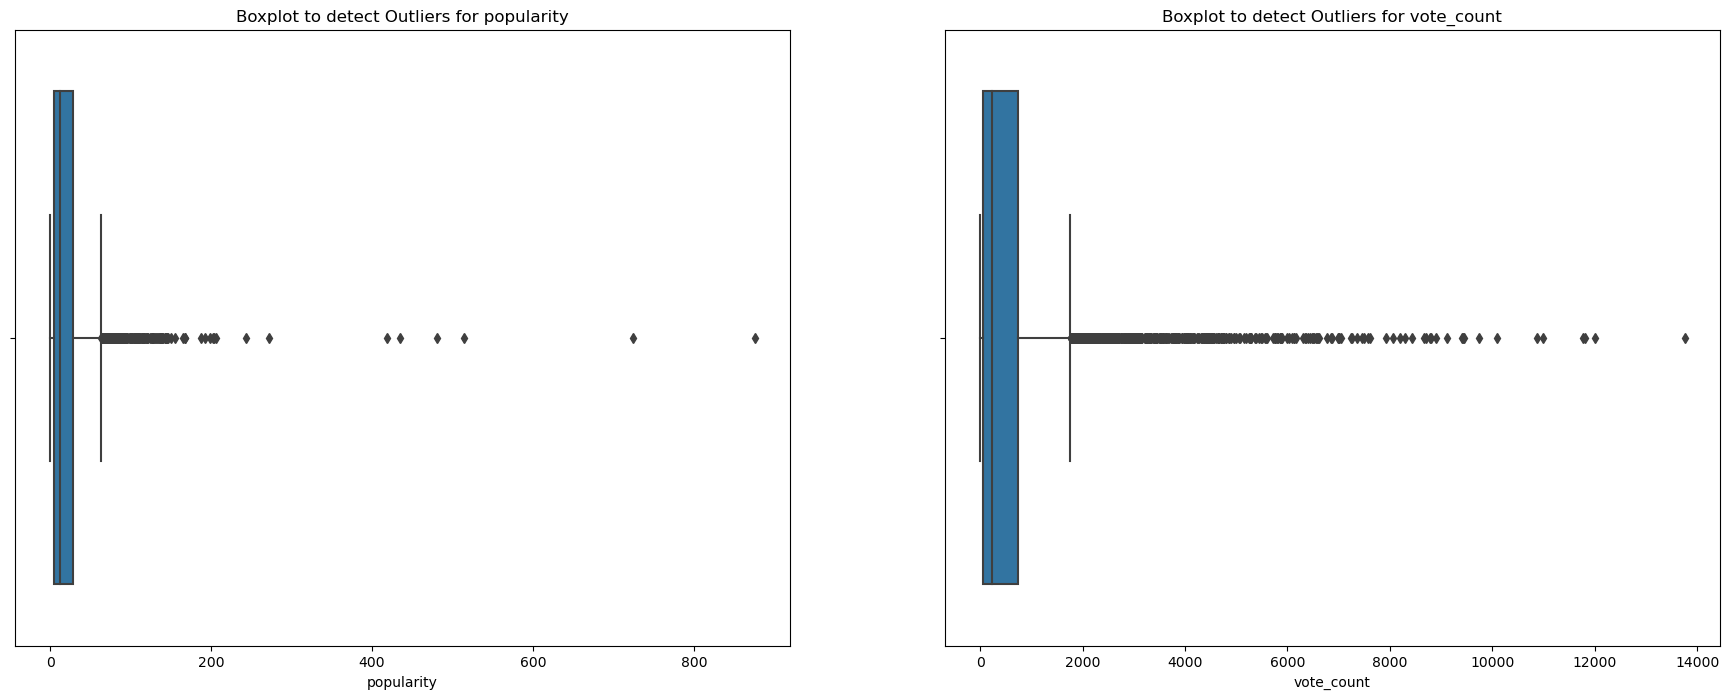

In [34]:
fig, ax = plt.subplots(1,2,figsize=(22,8))

sns.boxplot(x=movies_df2['popularity'], ax=ax[0])
sns.boxplot(x=movies_df2['vote_count'], ax=ax[1])

ax[0].set_title('Boxplot to detect Outliers for popularity')
ax[1].set_title('Boxplot to detect Outliers for vote_count')

plt.show()

In [35]:
pairplot_columns = movies_df2
pairplot_columns['profit'] = pairplot_columns['revenue'] - pairplot_columns['budget']
pairplot_columns.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release,rating_range,profit
0,237000000,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0,Post-2000,7-8,2550965087
1,300000000,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0,Post-2000,6-7,661000000
2,245000000,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0,Post-2000,6-7,635674609
3,250000000,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0,Post-2000,7-8,834939099
4,260000000,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0,Post-2000,6-7,24139100


In [36]:
pairplot_columns = pairplot_columns.drop(columns = ['Month_of_Release', 'Year_of_Release', 'Century_of_Release' ,'budget','revenue', 'keyword_list' ,'company_list', 'countries_list', 'title', 'release_date', 'genre_list', 'rating_range', 'id'])
pairplot_columns.head()

,popularity,runtime,vote_average,vote_count,profit
0,150.437577,162.0,7.2,11800,2550965087
1,139.082615,169.0,6.9,4500,661000000
2,107.376788,148.0,6.3,4466,635674609
3,112.312950,165.0,7.6,9106,834939099
4,43.926995,132.0,6.1,2124,24139100


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


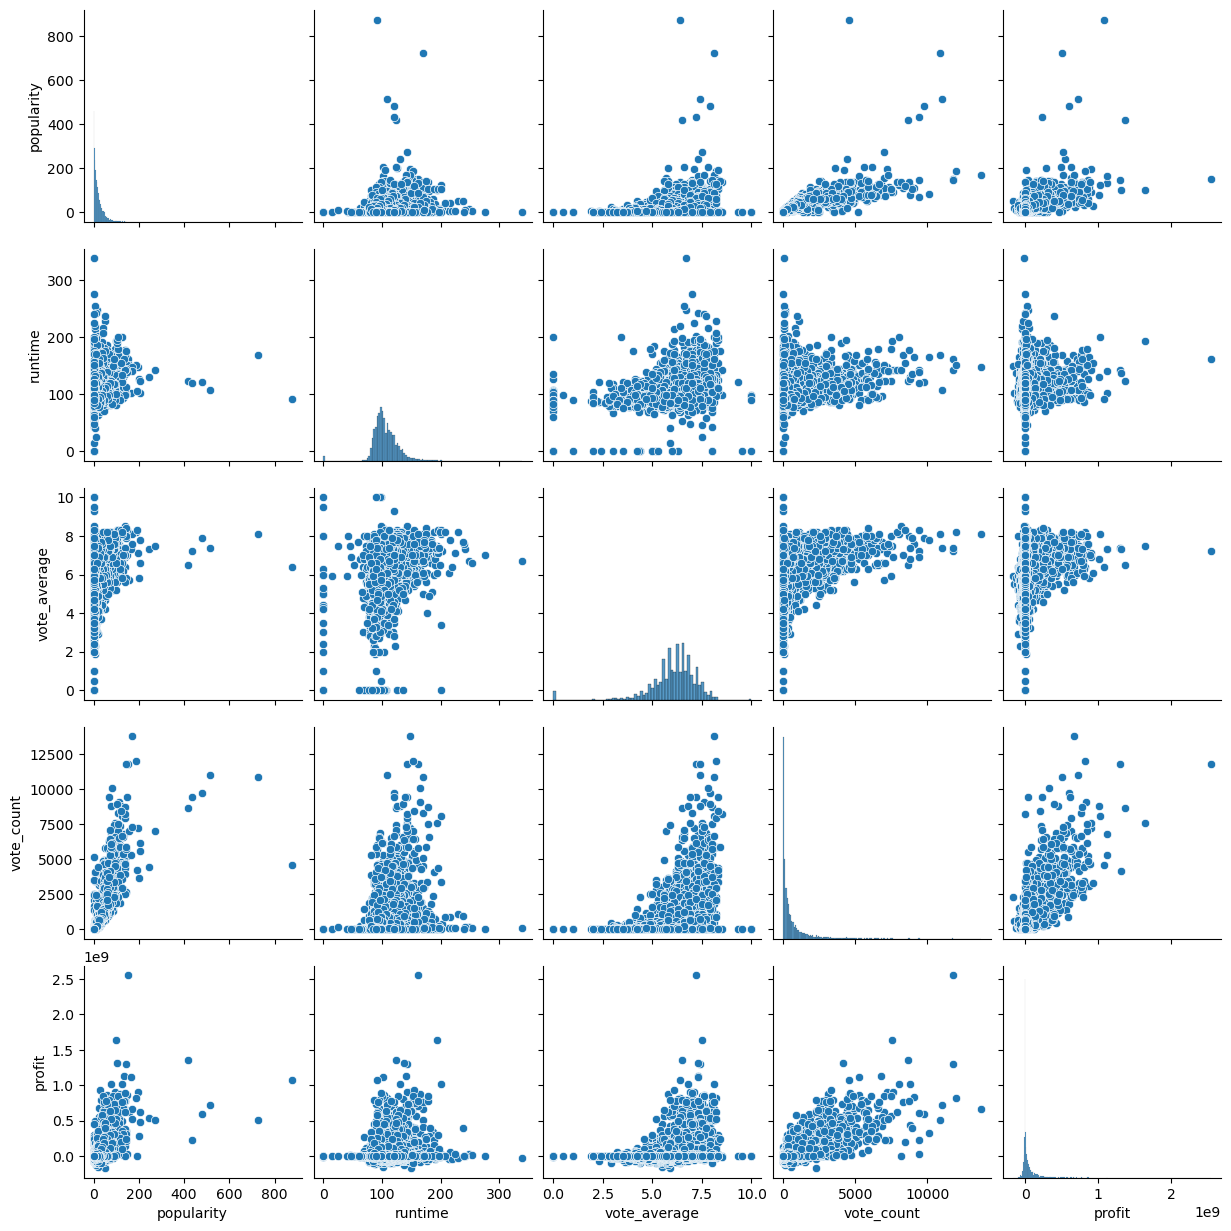

In [37]:
sns.pairplot(pairplot_columns)

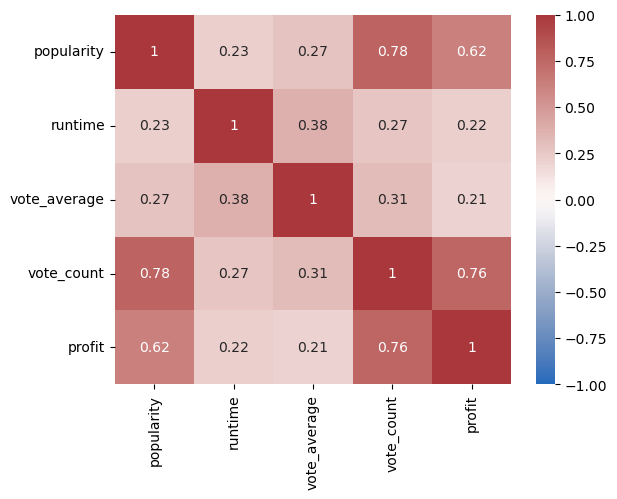

In [38]:
heatmap = sns.heatmap(pairplot_columns.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))


In [39]:
#LINEAR REGRESSION
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_data = pairplot_columns[["profit","vote_average"]]

ols_formula = "profit ~ vote_average"

In [40]:
OLS = ols(formula = ols_formula, data = model_data)
model = OLS.fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     217.6
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           3.33e-48
Time:                        12:04:28   Log-Likelihood:                -96658.
No. Observations:                4803   AIC:                         1.933e+05
Df Residuals:                    4801   BIC:                         1.933e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -9.118e+07   9.97e+06     -9.141      0.000   -1.11e+08   -7.16e+07
vote_average   2.37e+07   1.61e+06     14.752      0.000    2.06e+07    2.69e+07
==============================================================================
Omnibus:                     4916.390   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           418911.811
Skew:                           4.939   Prob(JB):                         0.00
Kurtosis:                      47.673   Cond. No.                         33.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
mask = movies_df2['profit'] <= 0
movies_df2[mask]
movies_df2['budget'] = movies_df2['budget'].astype(float)
movies_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   budget              4803 non-null   float64       
 1   id                  4803 non-null   int64         
 2   popularity          4803 non-null   float64       
 3   release_date        4802 non-null   datetime64[ns]
 4   revenue             4803 non-null   int64         
 5   runtime             4801 non-null   float64       
 6   title               4803 non-null   object        
 7   vote_average        4803 non-null   float64       
 8   vote_count          4803 non-null   int64         
 9   genre_list          4803 non-null   object        
 10  company_list        4803 non-null   object        
 11  countries_list      4803 non-null   object        
 12  keyword_list        4803 non-null   object        
 13  Year_of_Release     4802 non-null   float64     

In [43]:
profitability = []
for i in range(len(movies_df2)):
    if movies_df2['profit'][i] <= 0:
        profitability.append('unprofitable')
    else:
        profitability.append('profitable')
        
movies_df2['profitability'] = pd.DataFrame(profitability)
movies_df2.head()


,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release,rating_range,profit,profitability
0,237000000.0,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0,Post-2000,7-8,2550965087,profitable
1,300000000.0,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0,Post-2000,6-7,661000000,profitable
2,245000000.0,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0,Post-2000,6-7,635674609,profitable
3,250000000.0,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0,Post-2000,7-8,834939099,profitable
4,260000000.0,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0,Post-2000,6-7,24139100,profitable


In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

movies_df2['profitability'] = OneHotEncoder(drop='first').fit_transform(movies_df2[['profitability']]).toarray()
movies_df2['Century_of_Release'] = OneHotEncoder(drop='first').fit_transform(movies_df2[['Century_of_Release']]).toarray()
movies_df2.head()

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,genre_list,company_list,countries_list,keyword_list,Year_of_Release,Month_of_Release,Century_of_Release,rating_range,profit,profitability
0,237000000.0,19995,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",2009.0,12.0,0.0,7-8,2550965087,0.0
1,300000000.0,285,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",2007.0,5.0,0.0,6-7,661000000,0.0
2,245000000.0,206647,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",2015.0,10.0,0.0,6-7,635674609,0.0
3,250000000.0,49026,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",2012.0,7.0,0.0,7-8,834939099,0.0
4,260000000.0,49529,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 818, 'name': 'based on novel'}, {'id':...",2012.0,3.0,0.0,6-7,24139100,0.0


[[-0.64388054]]
[3.78230552]


<Axes: xlabel='vote_average', ylabel='profitability'>

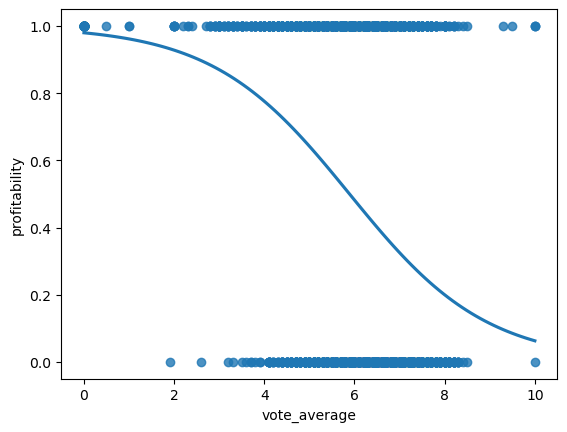

In [45]:
x = movies_df2[['vote_average']]
y = movies_df2['profitability']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
clf = LogisticRegression().fit(x_train, y_train)

print(clf.coef_)
print(clf.intercept_)

sns.regplot(x='vote_average', y='profitability',data=movies_df2,logistic=True,ci=None)

In [46]:
y_pred = clf.predict(x_test)
clf.predict_proba(x_test)

array([[0.53627758, 0.46372242],
       [0.62987815, 0.37012185],
       [0.62987815, 0.37012185],
       ...,
       [0.52023337, 0.47976663],
       [0.62987815, 0.37012185],
       [0.33365969, 0.66634031]])

In [47]:
log1_acc = metrics.accuracy_score(y_test, y_pred)
log1_prec = metrics.precision_score(y_test, y_pred)
log1_recall = metrics.recall_score(y_test, y_pred)
log1_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", "%.6f" % log1_acc)
print("Precision:", "%.6f" % log1_prec)
print("Recall:", "%.6f" % log1_recall)
print("F1 Score:", "%.6f" % log1_f1)

Accuracy: 0.614488
Precision: 0.614251
Recall: 0.449640
F1 Score: 0.519211


In [48]:
#Improved Logistic Regression
count = sort_ratings(movies_df2)
df = pd.DataFrame(count)
print(df.value_counts())
df.head()

6-7     1984
5-6     1303
7-8      903
4-5      356
3-4       84
8-9       79
0-1       64
2-3       21
9-10       6
1-2        3
Name: count, dtype: int64


,0
0,7-8
1,6-7
2,6-7
3,7-8
4,6-7


In [49]:
df_logreg = movies_df2[['popularity','runtime','vote_average','vote_count','profitability', 'Month_of_Release', 'Year_of_Release']]
df_logreg = df_logreg.dropna()
df_logreg.isna().sum()

popularity          0
runtime             0
vote_average        0
vote_count          0
profitability       0
Month_of_Release    0
Year_of_Release     0
dtype: int64

[[-0.0674763   0.00105749 -0.31164818 -0.00156048 -0.02368529  0.00169341]]
[-0.00327789]


<Axes: xlabel='vote_average', ylabel='profitability'>

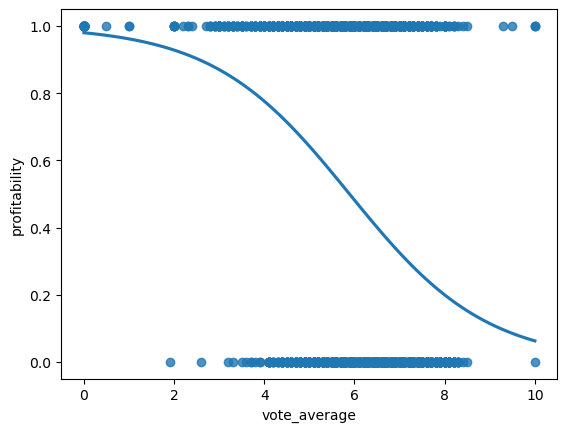

In [50]:
y = df_logreg['profitability']
x = df_logreg.drop('profitability', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=42)
clf = LogisticRegression(random_state=42, max_iter=500).fit(x_train, y_train)

print(clf.coef_)
print(clf.intercept_)

sns.regplot(x='vote_average', y='profitability',data=df_logreg, logistic=True, ci=None)

In [51]:
y_pred = clf.predict(x_test)
clf.predict_proba(x_test)

array([[9.99974240e-01, 2.57600994e-05],
       [4.65045361e-01, 5.34954639e-01],
       [3.18910767e-01, 6.81089233e-01],
       ...,
       [1.27974968e-01, 8.72025032e-01],
       [5.99410177e-01, 4.00589823e-01],
       [2.92795853e-01, 7.07204147e-01]])

In [52]:
log2_acc = metrics.accuracy_score(y_test, y_pred)
log2_prec = metrics.precision_score(y_test, y_pred)
log2_recall = metrics.recall_score(y_test, y_pred)
log2_f1 = metrics.f1_score(y_test, y_pred)

print("Accuracy:", "%.6f" % log2_acc)
print("Precision:", "%.6f" % log2_prec)
print("Recall:", "%.6f" % log2_recall)
print("F1 Score:", "%.6f" % log2_f1)


Accuracy: 0.777083
Precision: 0.725361
Recall: 0.831325
F1 Score: 0.774737
